<a href="https://colab.research.google.com/github/evans6544/object-detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2. Unzip your dataset
# (Replace with the correct name of your zip file!)
!unzip "/content/Bottles-Cups-Plates-Combined.v1-roboflow-instant-1--eval-.yolov8.zip"

Archive:  /content/Bottles-Cups-Plates-Combined.v1-roboflow-instant-1--eval-.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/-139_jpg.rf.0fae98143a130491b78c3982d47ed77a.jpg  
 extracting: test/images/-139_jpg.rf.b6c77d8ff70f81d7b218da61850eb7c0.jpg  
 extracting: test/images/-262_jpg.rf.5477e0adc0a1d0824f4ae1b2f09f2eb3.jpg  
 extracting: test/images/0035_jpg.rf.931a7b0bfc0d6e8ee63b93862208131c.jpg  
 extracting: test/images/0035_png.rf.e2d8a2973623e07e5e85707b6f5c972f.jpg  
 extracting: test/images/0041_png.rf.f46894d0658fdf6dcc5fb0cfed36d99a.jpg  
 extracting: test/images/0042_jpg.rf.74be822463ed76fc87ff04cab8e8b369.jpg  
 extracting: test/images/0049_png.rf.fb612a433f4366ef104b16860f0adceb.jpg  
 extracting: test/images/0092_png.rf.20e3b3077cc835d99ab6fbefeed604d4.jpg  
 extracting: test/images/0107_jpg.rf.ff67a6d7c862452cd5c859e6fd52e7d0

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# --- Experiment 1: WITH Transfer Learning ---
print("--- Starting Training WITH Transfer Learning (yolov8n.pt) ---")
model = YOLO('yolov8n.pt') # Loads pre-trained weights

# Train the model
# (Replace with the correct path to your data.yaml file!)
model.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    project='runs/detect', # Defines where to save
    name='train_transfer_learning' # Folder name
)

print("\n--- Finished Transfer Learning Training ---")


# --- Experiment 2: WITHOUT Transfer Learning ---
print("\n--- Starting Training WITHOUT Transfer Learning (yolov8n.yaml) ---")
model_scratch = YOLO('yolov8n.yaml') # Loads ARCHITECTURE ONLY

# Train the model from scratch
# (Replace with the correct path to your data.yaml file!)
model_scratch.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    project='runs/detect', # Defines where to save
    name='train_from_scratch' # Folder name
)

print("\n--- Finished 'From Scratch' Training ---")
print("All training is complete. You can now download your results.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
--- Starting Training WITH Transfer Learning (yolov8n.pt) ---
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7

In [ ]:
# Zip up the entire 'runs' folder
!zip -r yolov8_results.zip runs/

print("Your results are zipped. Download the 'yolov8_results.zip' file.")

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train_transfer_learning/ (stored 0%)
  adding: runs/detect/train_transfer_learning/BoxR_curve.png (deflated 15%)
  adding: runs/detect/train_transfer_learning/confusion_matrix_normalized.png (deflated 29%)
  adding: runs/detect/train_transfer_learning/train_batch281.jpg (deflated 11%)
  adding: runs/detect/train_transfer_learning/labels.jpg (deflated 43%)
  adding: runs/detect/train_transfer_learning/train_batch280.jpg (deflated 11%)
  adding: runs/detect/train_transfer_learning/weights/ (stored 0%)
  adding: runs/detect/train_transfer_learning/weights/last.pt (deflated 9%)
  adding: runs/detect/train_transfer_learning/weights/best.pt (deflated 9%)
  adding: runs/detect/train_transfer_learning/BoxP_curve.png (deflated 17%)
  adding: runs/detect/train_transfer_learning/train_batch2.jpg (deflated 4%)
  adding: runs/detect/train_transfer_learning/args.yaml (deflated 53%)
  adding: runs/detect/train_transf

In [ ]:
from ultralytics import YOLO

# --- 1. Define Paths ---
# Paths to the models you just trained
MODEL_TRANSFER_PATH = '/content/runs/detect/train_transfer_learning/weights/best.pt'
MODEL_SCRATCH_PATH = 'runs/detect/train_from_scratch/weights/best.pt'

# Path to your dataset's YAML file
DATA_YAML_PATH = '/content/data.yaml'

print("--- Evaluating Model 1 (With Transfer Learning) ---")
# Load the transfer learning model
model_transfer = YOLO(MODEL_TRANSFER_PATH)
# Run validation on the test split
metrics_transfer = model_transfer.val(data=DATA_YAML_PATH, split='test')


print("\n--- Evaluating Model 2 (Without Transfer Learning) ---")
# Load the 'from scratch' model
model_scratch = YOLO(MODEL_SCRATCH_PATH)
# Run validation on the test split
metrics_scratch = model_scratch.val(data=DATA_YAML_PATH, split='test')


# --- 3. Print Comparison ---
print("\n\n--- Results Comparison ---")

print("\n[With Transfer Learning]")
print(f"mAP50-95: {metrics_transfer.box.map:.4f}")
print(f"mAP50:    {metrics_transfer.box.map50:.4f}")
print(f"Precision:{metrics_transfer.box.p[0]:.4f}") # [0] for all-class precision
print(f"Recall:   {metrics_transfer.box.r[0]:.4f}") # [0] for all-class recall

print("\n[Without Transfer Learning]")
print(f"mAP50-95: {metrics_scratch.box.map:.4f}")
print(f"mAP50:    {metrics_scratch.box.map50:.4f}")
print(f"Precision:{metrics_scratch.box.p[0]:.4f}")
print(f"Recall:   {metrics_scratch.box.r[0]:.4f}")

--- Evaluating Model 1 (With Transfer Learning) ---
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 108.8±134.7 MB/s, size: 27.4 KB)
val: Scanning /content/test/labels... 15 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 15/15 1.3Kit/s 0.0s
val: New cache created: /content/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.0it/s 0.5s
                   all         15         24      0.994          1      0.995      0.926
------------------------------          8          8      0.994          1      0.995      0.945
Cups and Plates - v2 cupsandchairs9-15pm          8          9      0.994          1      0.995      0.942
bottles - v1 2024-10-30 2-22pm          7          7      0.994          1      0.995      0.892
Speed: 2.4ms preprocess

Running predictions on images in: /content/test/images

image 1/15 /content/test/images/-139_jpg.rf.0fae98143a130491b78c3982d47ed77a.jpg: 640x640 2 bottles - v1 2024-10-30 2-22pms, 8.4ms
image 2/15 /content/test/images/-139_jpg.rf.b6c77d8ff70f81d7b218da61850eb7c0.jpg: 640x640 2 bottles - v1 2024-10-30 2-22pms, 7.3ms
image 3/15 /content/test/images/-262_jpg.rf.5477e0adc0a1d0824f4ae1b2f09f2eb3.jpg: 640x640 1 bottles - v1 2024-10-30 2-22pm, 7.2ms
image 4/15 /content/test/images/0035_jpg.rf.931a7b0bfc0d6e8ee63b93862208131c.jpg: 640x640 1 bottles - v1 2024-10-30 2-22pm, 7.3ms
image 5/15 /content/test/images/0035_png.rf.e2d8a2973623e07e5e85707b6f5c972f.jpg: 640x640 1 ------------------------------, 2 Cups and Plates - v2 cupsandchairs9-15pms, 7.3ms
image 6/15 /content/test/images/0041_png.rf.f46894d0658fdf6dcc5fb0cfed36d99a.jpg: 640x640 1 ------------------------------, 1 Cups and Plates - v2 cupsandchairs9-15pm, 7.3ms
image 7/15 /content/test/images/0042_jpg.rf.74be822463ed76fc87ff04cab8e8b

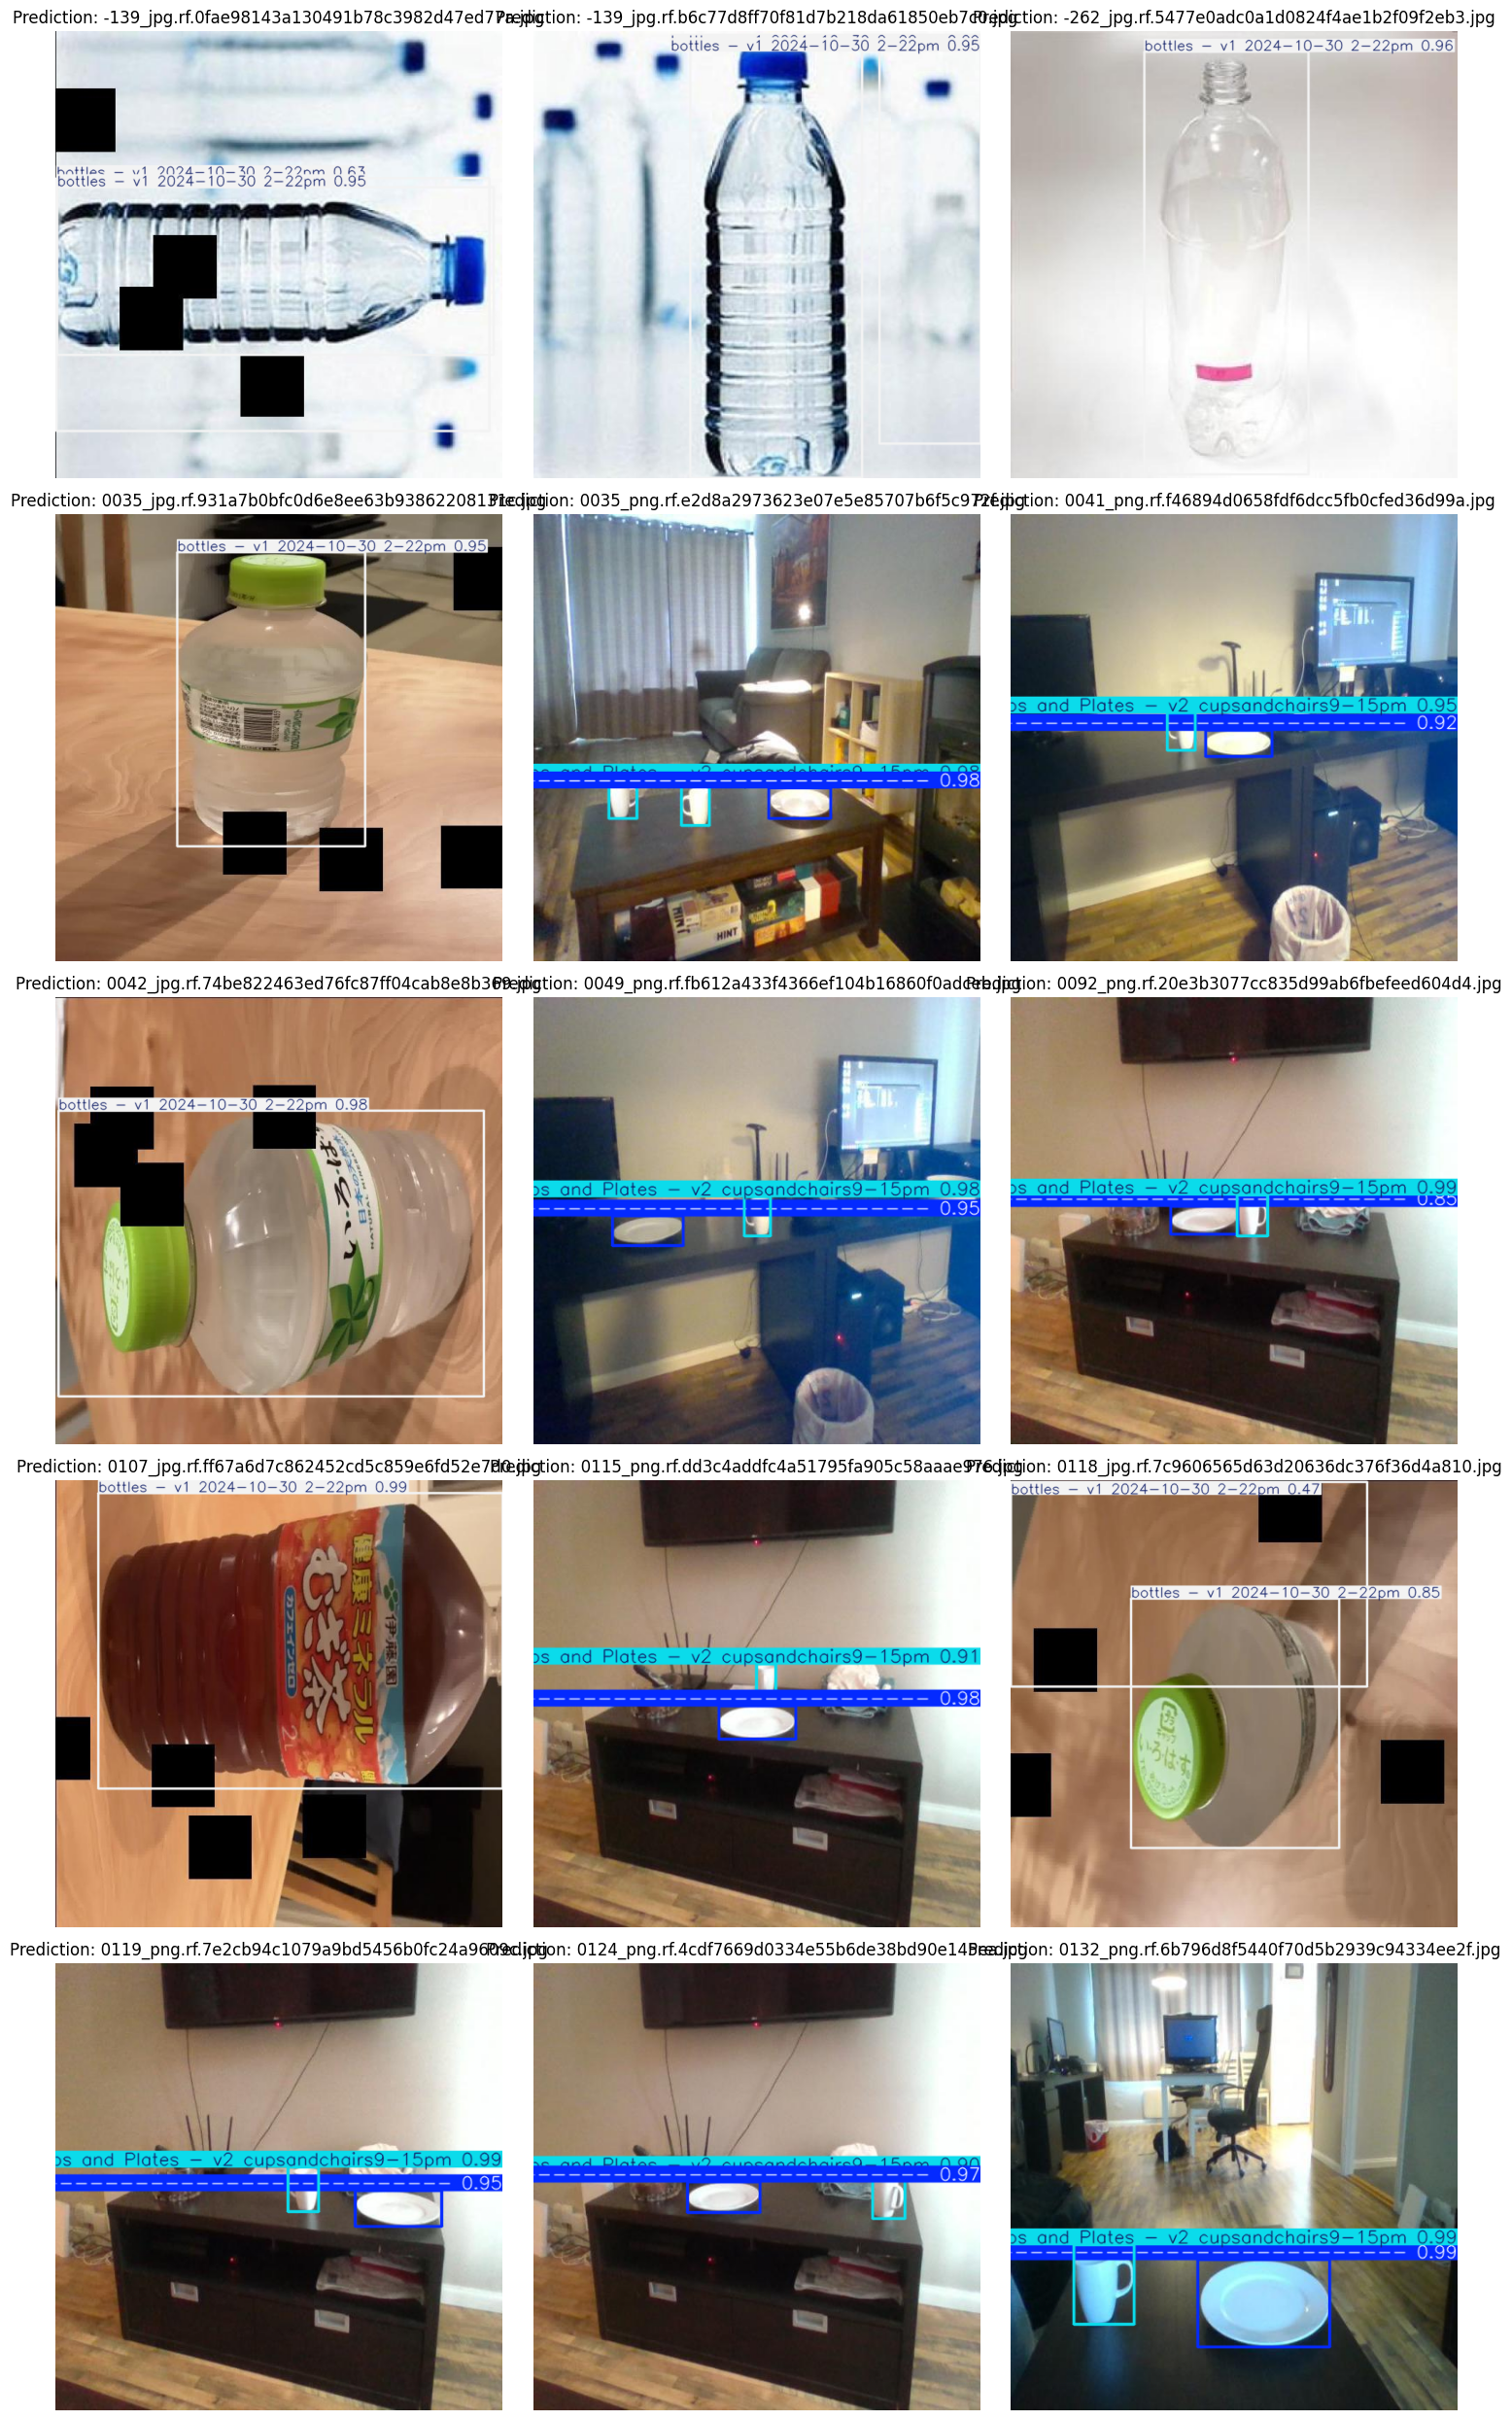

In [ ]:
import matplotlib.pyplot as plt
import cv2
import math

# --- 1. Load your best model ---
# Use the model you want to visualize (e.g., the transfer learning one)
best_model = YOLO('/content/runs/detect/train_transfer_learning/weights/best.pt')

# --- 2. Define path to your test images ---
TEST_IMAGES_PATH = '/content/test/images'

print(f"Running predictions on images in: {TEST_IMAGES_PATH}")

# --- 3. Run predictions (but don't save to a folder this time) ---
# We set save=False because we will plot them manually
results = best_model.predict(source=TEST_IMAGES_PATH, save=False)

# --- 4. Prepare for Plotting ---
# Convert results to a list to easily count them
results_list = list(results)
num_images = len(results_list)

# Dynamically create a grid for the subplots
cols = 3  # You can adjust the number of columns
rows = math.ceil(num_images / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

print(f"Displaying {num_images} prediction images...")

# --- 5. Create the Subplots ---
for i, result in enumerate(results_list):
    # The .plot() method returns the image with bounding boxes drawn on it (as a NumPy array)
    # The BGR image is converted to RGB for correct color display with matplotlib
    plotted_image = cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB)

    ax = axes[i]
    ax.imshow(plotted_image)
    ax.set_title(f"Prediction: {result.path.split('/')[-1]}") # Use filename as title
    ax.axis('off') # Hide the axes

# Hide any unused subplots
for j in range(num_images, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()